# Volume exception predictive model

### Developing a forecasting model to evaluate transport data and verifying if a transported volume exception can occur
### Database provided by the company

## Preliminary analyzes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('dados/Task_Exception Prediction_Training Test Data.csv', delimiter=';')
df

C:\Users\guilh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,19,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Transport Order id,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Handling_unit_quantity [qty],Billed freight weight [kg],Means_of_transportation,Carrier ID,Mode_of_Transportation,Pickup_weekday,...,Pickup_timewindow_length [hrs],Delivery_timewindow_length [hrs],Plant Shutdown on pickup or delivery day,Exception happened 1week ago,Exception happened 2weeks ago,Holiday during pickup or delivery day,distance cluster,Pickup_weeknumber,Delivery_weeknumber,Exception_output
0,VBDK1645,13,"14136,72","92,66",78,"14136,72",mega,CHOM01,FTL,Dienstag,...,2.0,2.0,False,False,False,False,>1800 km,28,28,Good
1,VBEF1807,13,"14136,72","92,66",78,"14136,72",Mega,CHOM01,FTL,Freitag,...,2.0,2.0,False,False,False,True,>1800 km,28,29,Good
2,VBEMAWJR,"13,5",7000,"97,2",72,14580,Mega,RABE01,FTL,Dienstag,...,2.0,2.0,False,False,False,False,500-800 km,28,28,Good
3,VBEMAWJT,"13,5",7000,"97,2",72,14580,Mega,RABE01,FTL,Donnerstag,...,2.0,2.0,False,False,False,False,500-800 km,28,28,Good
4,VBEMAWKW,13,24000,"93,6",78,24000,meGa,SOST01,FTL,Dienstag,...,1.0,1.0,False,False,False,False,800-1300 km,28,28,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94455,VBYR1645,15,16119,"105,3",90,16119,Jumbo,CEEL01,FTL,Wednesday,...,1.0,1.0,False,False,False,False,>1800 km,50,51,Good
94456,VBYR1646,15,"16076,3","105,3",90,"16076,3",Jumbo,CEEL01,FTL,NaN,...,1.0,1.0,False,False,False,False,>1800 km,50,51,Good
94457,VBYR1647,"13,8","15299,54","90,77",82,"15299,54",Jumbo,CEEL01,FTL,Wednesday,...,1.0,1.0,False,False,False,False,>1800 km,50,51,Good
94458,VBYR1648,"2,8","2279,2","14,15",14,"2279,2",Standard,DSVR04,LTL,Monday,...,8.0,7.0,False,False,False,False,1300-1800 km,50,50,Good


#### Transforming the categorical variables in binary variables

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Exception_output']= label_encoder.fit_transform(df['Exception_output'])
print(df)

      Transport Order id Loading_meter [ldm] Gross_weight [kg] Volume [m3]  \
0               VBDK1645                  13          14136,72       92,66   
1               VBEF1807                  13          14136,72       92,66   
2               VBEMAWJR                13,5              7000        97,2   
3               VBEMAWJT                13,5              7000        97,2   
4               VBEMAWKW                  13             24000        93,6   
...                  ...                 ...               ...         ...   
94455           VBYR1645                  15             16119       105,3   
94456           VBYR1646                  15           16076,3       105,3   
94457           VBYR1647                13,8          15299,54       90,77   
94458           VBYR1648                 2,8            2279,2       14,15   
94459           VBYR1649                 1,3            998,92        6,66   

       Handling_unit_quantity [qty] Billed freight weight [kg] 

In [4]:
df = pd.DataFrame(df)
df

,Transport Order id,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Handling_unit_quantity [qty],Billed freight weight [kg],Means_of_transportation,Carrier ID,Mode_of_Transportation,Pickup_weekday,...,Pickup_timewindow_length [hrs],Delivery_timewindow_length [hrs],Plant Shutdown on pickup or delivery day,Exception happened 1week ago,Exception happened 2weeks ago,Holiday during pickup or delivery day,distance cluster,Pickup_weeknumber,Delivery_weeknumber,Exception_output
0,VBDK1645,13,"14136,72","92,66",78,"14136,72",mega,CHOM01,FTL,Dienstag,...,2.0,2.0,False,False,False,False,>1800 km,28,28,0
1,VBEF1807,13,"14136,72","92,66",78,"14136,72",Mega,CHOM01,FTL,Freitag,...,2.0,2.0,False,False,False,True,>1800 km,28,29,0
2,VBEMAWJR,"13,5",7000,"97,2",72,14580,Mega,RABE01,FTL,Dienstag,...,2.0,2.0,False,False,False,False,500-800 km,28,28,0
3,VBEMAWJT,"13,5",7000,"97,2",72,14580,Mega,RABE01,FTL,Donnerstag,...,2.0,2.0,False,False,False,False,500-800 km,28,28,0
4,VBEMAWKW,13,24000,"93,6",78,24000,meGa,SOST01,FTL,Dienstag,...,1.0,1.0,False,False,False,False,800-1300 km,28,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94455,VBYR1645,15,16119,"105,3",90,16119,Jumbo,CEEL01,FTL,Wednesday,...,1.0,1.0,False,False,False,False,>1800 km,50,51,0
94456,VBYR1646,15,"16076,3","105,3",90,"16076,3",Jumbo,CEEL01,FTL,NaN,...,1.0,1.0,False,False,False,False,>1800 km,50,51,0
94457,VBYR1647,"13,8","15299,54","90,77",82,"15299,54",Jumbo,CEEL01,FTL,Wednesday,...,1.0,1.0,False,False,False,False,>1800 km,50,51,0
94458,VBYR1648,"2,8","2279,2","14,15",14,"2279,2",Standard,DSVR04,LTL,Monday,...,8.0,7.0,False,False,False,False,1300-1800 km,50,50,0


#### Checking for nulls and duplicates

In [5]:
df.isnull().sum()

Transport Order id                            0
Loading_meter [ldm]                           0
Gross_weight [kg]                             0
Volume [m3]                                   0
Handling_unit_quantity [qty]                  0
Billed freight weight [kg]                    0
Means_of_transportation                       1
Carrier ID                                    3
Mode_of_Transportation                        0
Pickup_weekday                              952
Delivery_weekday                            959
Consignor_country                           935
Recipient_country                           966
Number_of_Stops                             929
Weeks_after_project_GoLive                  944
Pickup_Month                                947
Pickup_Year                                 914
Custom clearance needed                     991
Pickup_timewindow_length [hrs]              936
Delivery_timewindow_length [hrs]            930
Plant Shutdown on pickup or delivery day

In [6]:
miss_perc = (df.isnull().sum() / len(df['Transport Order id']))*100
print(miss_perc)

Transport Order id                          0.000000
Loading_meter [ldm]                         0.000000
Gross_weight [kg]                           0.000000
Volume [m3]                                 0.000000
Handling_unit_quantity [qty]                0.000000
Billed freight weight [kg]                  0.000000
Means_of_transportation                     0.001059
Carrier ID                                  0.003176
Mode_of_Transportation                      0.000000
Pickup_weekday                              1.007834
Delivery_weekday                            1.015245
Consignor_country                           0.989837
Recipient_country                           1.022655
Number_of_Stops                             0.983485
Weeks_after_project_GoLive                  0.999365
Pickup_Month                                1.002541
Pickup_Year                                 0.967605
Custom clearance needed                     1.049121
Pickup_timewindow_length [hrs]              0.

In [7]:
s = df.Exception_output
percent = s.value_counts(normalize=True)
percent

0    0.872115
1    0.127885
Name: Exception_output, dtype: float64

In [8]:
df.duplicated().sum()

0

#### Filtering data associated with weight and volume

In [9]:
df = df.filter(items = ['Loading_meter [ldm]', 
                    'Gross_weight [kg]', 
                    'Volume [m3]', 
                    'Handling_unit_quantity [qty]', 
                    'Billed freight weight [kg]', 
                    'Exception_output'])
df.head()

,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Handling_unit_quantity [qty],Billed freight weight [kg],Exception_output
0,13,"14136,72","92,66",78,"14136,72",0
1,13,"14136,72","92,66",78,"14136,72",0
2,"13,5",7000,"97,2",72,14580,0
3,"13,5",7000,"97,2",72,14580,0
4,13,24000,"93,6",78,24000,0


In [10]:
df['Loading_meter [ldm]'] = df['Loading_meter [ldm]'].apply(lambda x: str(x).replace(",","."))
df['Gross_weight [kg]'] = df['Gross_weight [kg]'].apply(lambda x: str(x).replace(",","."))
df['Volume [m3]'] = df['Volume [m3]'].apply(lambda x: str(x).replace(",","."))
df['Billed freight weight [kg]'] = df['Billed freight weight [kg]'].apply(lambda x: str(x).replace(",","."))

In [11]:
df.head()

,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Handling_unit_quantity [qty],Billed freight weight [kg],Exception_output
0,13,14136.72,92.66,78,14136.72,0
1,13,14136.72,92.66,78,14136.72,0
2,13.5,7000,97.2,72,14580,0
3,13.5,7000,97.2,72,14580,0
4,13,24000,93.6,78,24000,0


In [12]:
df.dtypes

Loading_meter [ldm]             object
Gross_weight [kg]               object
Volume [m3]                     object
Handling_unit_quantity [qty]     int64
Billed freight weight [kg]      object
Exception_output                 int32
dtype: object

#### Change the types os variables

In [13]:
df['Loading_meter [ldm]'] = df['Loading_meter [ldm]'].astype('float64')
df['Gross_weight [kg]'] = df['Gross_weight [kg]'].astype('float64')
df['Volume [m3]'] = df['Volume [m3]'].astype('float64')
df['Billed freight weight [kg]'] = df['Billed freight weight [kg]'].astype('float64')

In [14]:
df.dtypes

Loading_meter [ldm]             float64
Gross_weight [kg]               float64
Volume [m3]                     float64
Handling_unit_quantity [qty]      int64
Billed freight weight [kg]      float64
Exception_output                  int32
dtype: object

#### Making a describle analysis

In [15]:
df.describe().round(2)

,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Handling_unit_quantity [qty],Billed freight weight [kg],Exception_output
count,94460.00,94460.00,94460.00,94460.00,94460.00,94460.00
mean,3.47,1777.04,18.51,19.96,3266.21,0.13
std,4.54,3003.70,30.16,97.96,4755.28,0.33
min,0.00,0.89,0.00,1.00,1.01,0.00
25%,0.40,122.00,1.01,1.00,193.15,0.00
50%,1.14,448.02,3.12,4.00,658.08,0.00
75%,4.53,2144.61,17.95,18.00,4160.00,0.00
max,34.40,31087.90,184.75,2380.00,31087.90,1.00


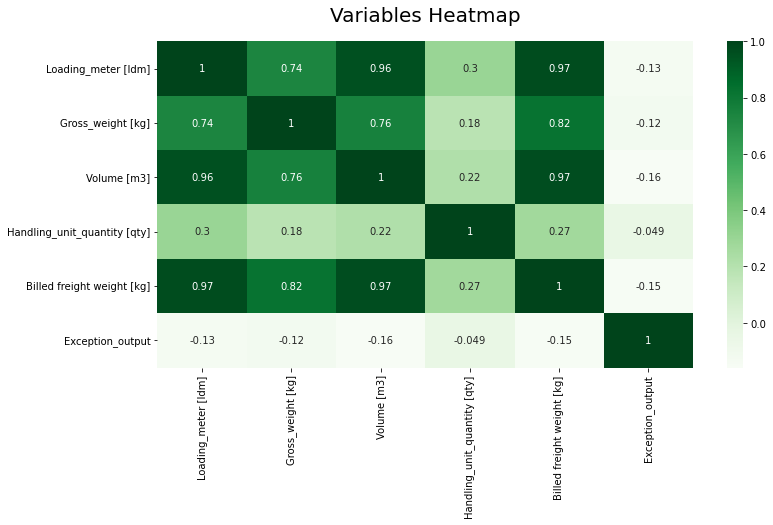

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap='Greens')
plt.title('Variables Heatmap', fontsize = 20, pad = 20)
plt.show()

### Features selections

#### 1º Method  f_classif (KBest)

In [17]:
df.head()

,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Handling_unit_quantity [qty],Billed freight weight [kg],Exception_output
0,13.0,14136.72,92.66,78,14136.72,0
1,13.0,14136.72,92.66,78,14136.72,0
2,13.5,7000.00,97.20,72,14580.00,0
3,13.5,7000.00,97.20,72,14580.00,0
4,13.0,24000.00,93.60,78,24000.00,0


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

X = df.drop(['Exception_output'], axis=1)
Y = df['Exception_output']

In [19]:
f_classif = SelectKBest(score_func=f_classif, k=4)
fit = f_classif.fit(X, Y)
features = fit.transform(X)

In [20]:
print('\nNumber of original features:', X.shape[1])
print('\nNumber of reduced features:', features.shape[1])
print('\nFeatures selected:', features)


Number of original features: 5

Number of reduced features: 4

Features selected: [[1.300000e+01 1.413672e+04 9.266000e+01 1.413672e+04]
 [1.300000e+01 1.413672e+04 9.266000e+01 1.413672e+04]
 [1.350000e+01 7.000000e+03 9.720000e+01 1.458000e+04]
 ...
 [1.380000e+01 1.529954e+04 9.077000e+01 1.529954e+04]
 [2.800000e+00 2.279200e+03 1.415000e+01 2.279200e+03]
 [1.300000e+00 9.989200e+02 6.660000e+00 9.990000e+02]]


In [21]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,Loading_meter [ldm],Gross_weight [kg],Volume [m3],Billed freight weight [kg]
0,13.0,14136.72,92.66,14136.72
1,13.0,14136.72,92.66,14136.72
2,13.5,7000.00,97.20,14580.00
3,13.5,7000.00,97.20,14580.00
4,13.0,24000.00,93.60,24000.00
...,...,...,...,...
94455,15.0,16119.00,105.30,16119.00
94456,15.0,16076.30,105.30,16076.30
94457,13.8,15299.54,90.77,15299.54
94458,2.8,2279.20,14.15,2279.20


#### 2º Method (RandomForestClassifier)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_f = RandomForestClassifier(n_estimators=10)
model_f.fit(X,Y)

RandomForestClassifier(n_estimators=10)

In [23]:
print(model_f.feature_importances_)

[0.11776641 0.34667929 0.24997514 0.0745598  0.21101936]


In [24]:
X.columns

Index(['Loading_meter [ldm]', 'Gross_weight [kg]', 'Volume [m3]',
       'Handling_unit_quantity [qty]', 'Billed freight weight [kg]'],
      dtype='object')

In [25]:
feature_importances = pd.DataFrame(model_f.feature_importances_,
                                  index = X.columns,
                                  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Gross_weight [kg],0.346679
Volume [m3],0.249975
Billed freight weight [kg],0.211019
Loading_meter [ldm],0.117766
Handling_unit_quantity [qty],0.074560


#### 3º Method LogisticRegression (RFE)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model_lr = LogisticRegression(max_iter=2000)
rfe = RFE(model_lr, 4)
fit = rfe.fit(X,Y)

print('Number of features: {}' .format(fit.n_features_))

C:\Users\guilh\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Number of features: 4


### Analyzing selected features

In [27]:
df2 = df.filter(items = ['Gross_weight [kg]', 
                         'Volume [m3]', 
                         'Billed freight weight [kg]', 
                         'Loading_meter [ldm]', 
                         'Exception_output'])

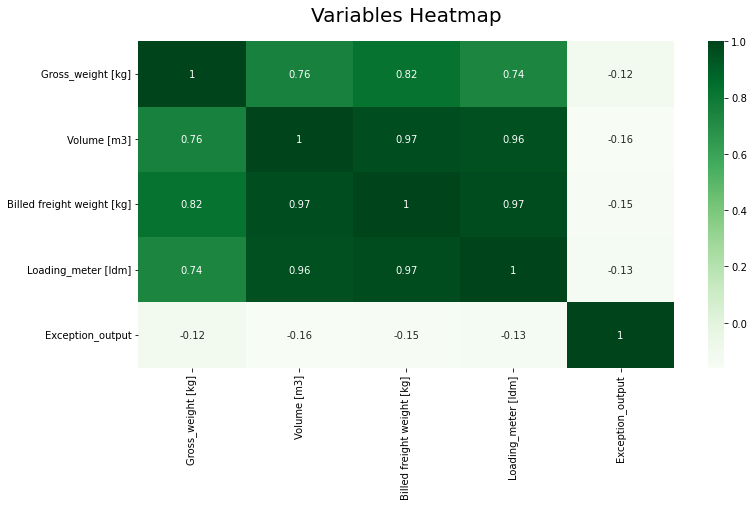

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(), annot = True, cmap='Greens')
plt.title('Variables Heatmap', fontsize = 20, pad = 20)
plt.show()

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Gross_weight [kg]', ylabel='Density'>

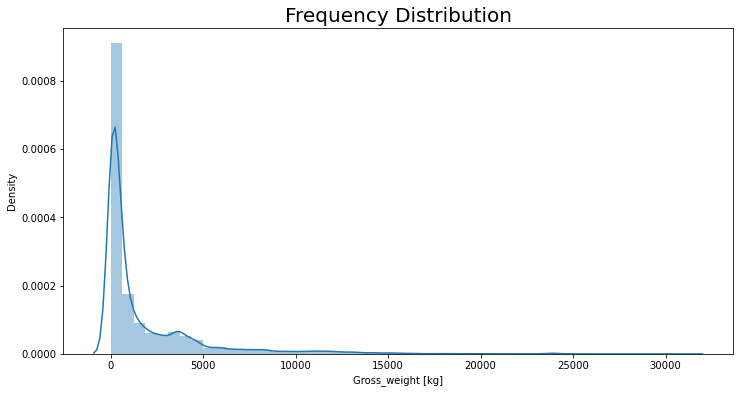

In [29]:
ax = sns.distplot(df2['Gross_weight [kg]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Volume [m3]', ylabel='Density'>

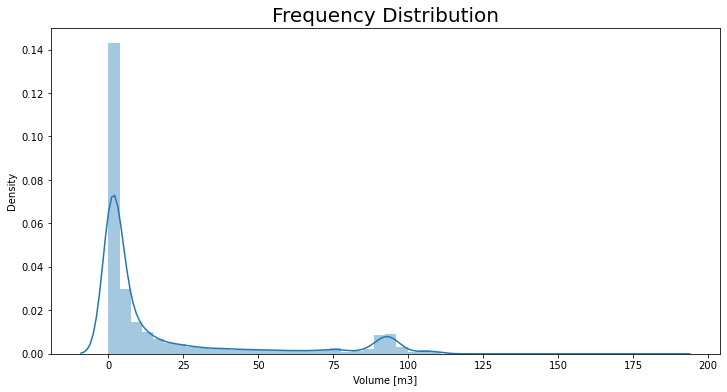

In [30]:
ax = sns.distplot(df2['Volume [m3]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Billed freight weight [kg]', ylabel='Density'>

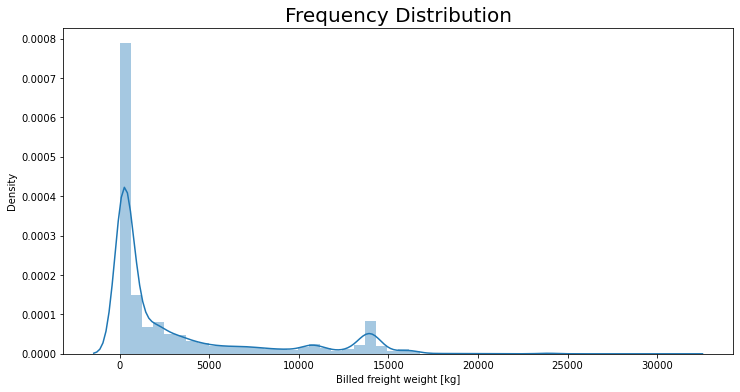

In [31]:
ax = sns.distplot(df2['Billed freight weight [kg]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='Loading_meter [ldm]', ylabel='Density'>

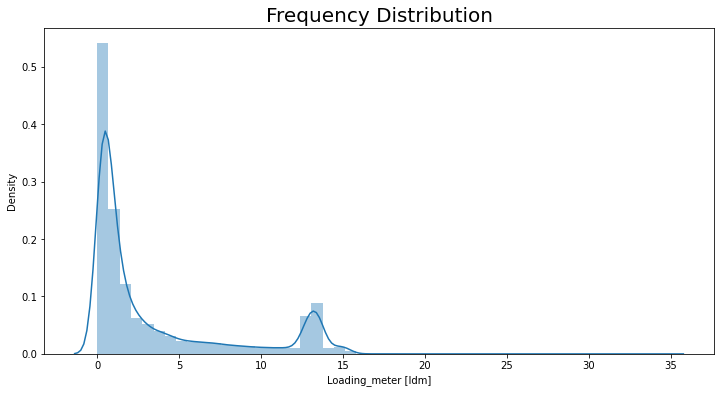

In [32]:
ax = sns.distplot(df2['Loading_meter [ldm]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

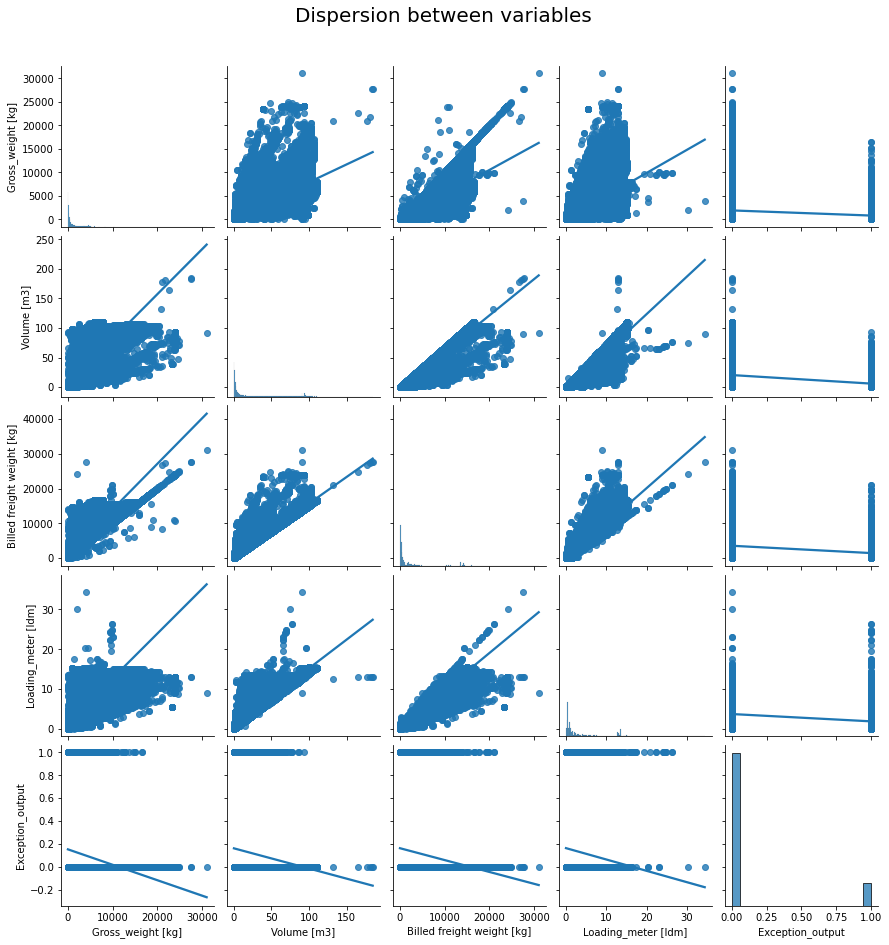

In [33]:
ax = sns.pairplot(df2, kind='reg')
ax.fig.suptitle('Dispersion between variables', fontsize=20, y=1.05)
ax

### Applying logarithmic transformation to the dataset

In [34]:
df2.describe().round(2)

,Gross_weight [kg],Volume [m3],Billed freight weight [kg],Loading_meter [ldm],Exception_output
count,94460.00,94460.00,94460.00,94460.00,94460.00
mean,1777.04,18.51,3266.21,3.47,0.13
std,3003.70,30.16,4755.28,4.54,0.33
min,0.89,0.00,1.01,0.00,0.00
25%,122.00,1.01,193.15,0.40,0.00
50%,448.02,3.12,658.08,1.14,0.00
75%,2144.61,17.95,4160.00,4.53,0.00
max,31087.90,184.75,31087.90,34.40,1.00


In [35]:
df2['log_Gross_weight [kg]'] = np.log(df2['Gross_weight [kg]'])
df2['log_Volume [m3]'] = np.log(df2['Volume [m3]'] + 1)
df2['log_Billed freight weight [kg]'] = np.log(df2['Billed freight weight [kg]'])
df2['log_Loading_meter [ldm]'] = np.log(df2['Loading_meter [ldm]'] + 1)

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='log_Gross_weight [kg]', ylabel='Density'>

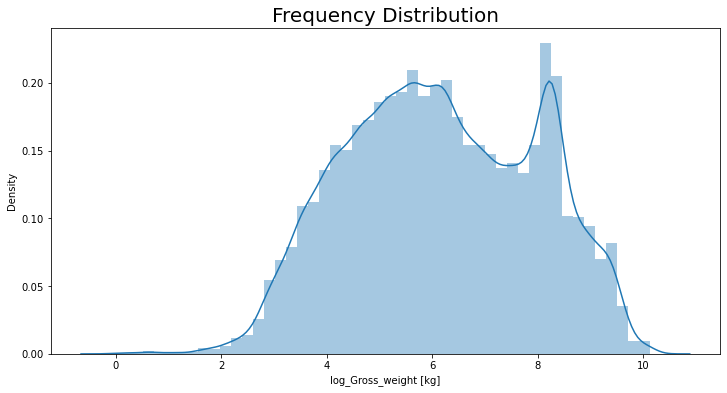

In [36]:
ax = sns.distplot(df2['log_Gross_weight [kg]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='log_Volume [m3]', ylabel='Density'>

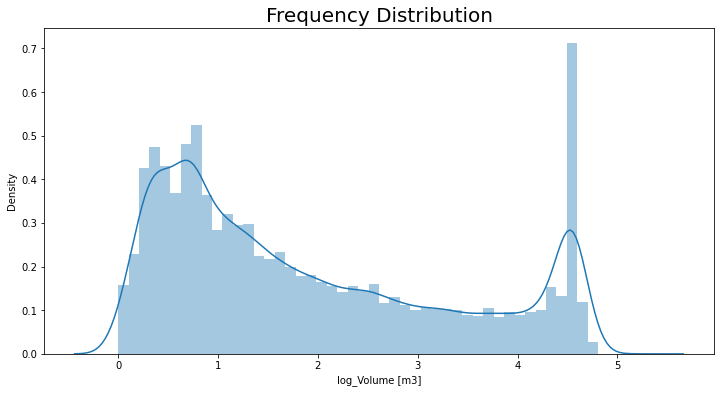

In [37]:
ax = sns.distplot(df2['log_Volume [m3]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='log_Billed freight weight [kg]', ylabel='Density'>

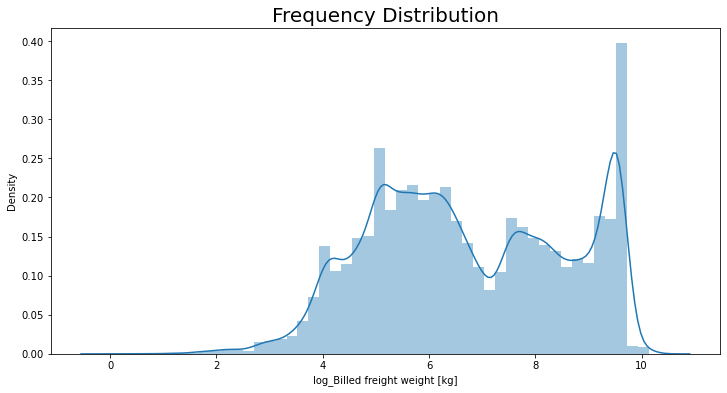

In [38]:
ax = sns.distplot(df2['log_Billed freight weight [kg]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Frequency Distribution'}, xlabel='log_Loading_meter [ldm]', ylabel='Density'>

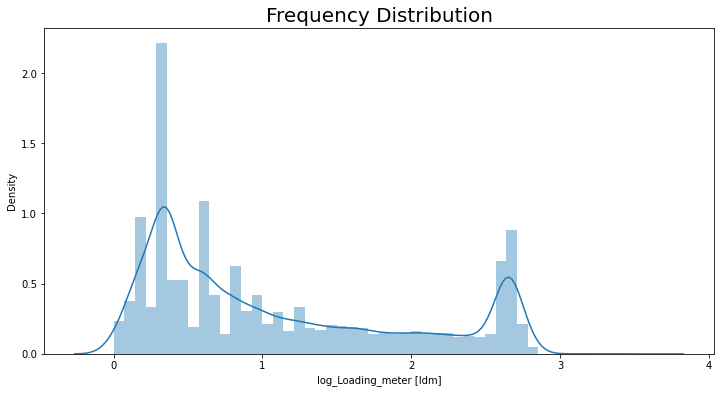

In [39]:
ax = sns.distplot(df2['log_Loading_meter [ldm]'])
ax.set_title('Frequency Distribution', fontsize=20)
ax.figure.set_size_inches(12,6)
ax

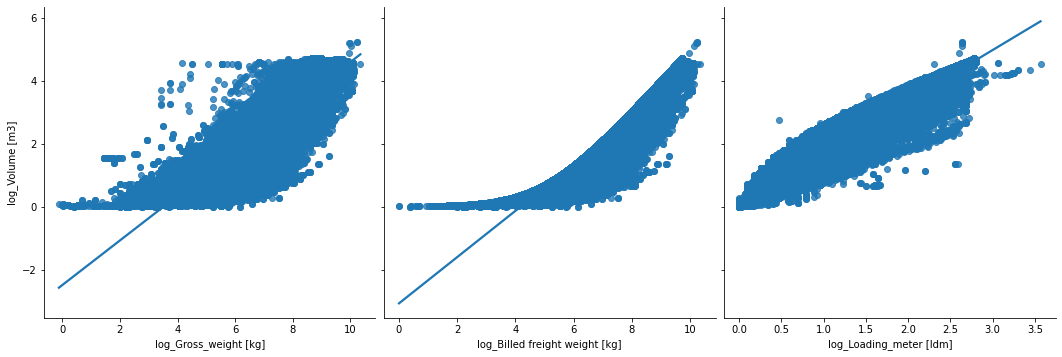

In [40]:
ax = sns.pairplot(df2, y_vars='log_Volume [m3]', 
                  x_vars=['log_Gross_weight [kg]', 'log_Billed freight weight [kg]', 'log_Loading_meter [ldm]'], 
                  height=5,
                 kind='reg')
ax

<AxesSubplot:xlabel='log_Gross_weight [kg]', ylabel='log_Volume [m3]'>

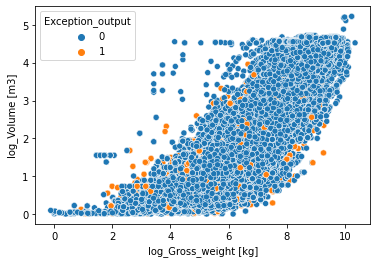

In [41]:
sns.scatterplot(x='log_Gross_weight [kg]', y='log_Volume [m3]', hue='Exception_output', data=df2)

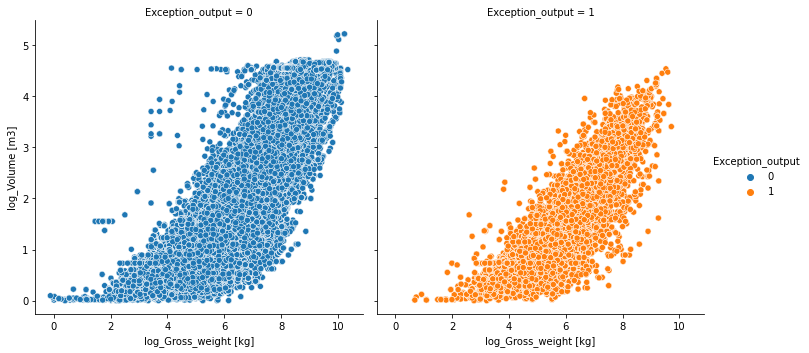

In [42]:
sns.relplot(x='log_Gross_weight [kg]', y='log_Volume [m3]', hue='Exception_output', col='Exception_output', data=df2)

<AxesSubplot:xlabel='log_Billed freight weight [kg]', ylabel='log_Volume [m3]'>

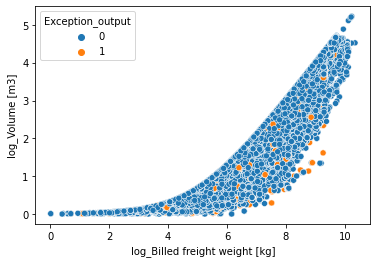

In [43]:
sns.scatterplot(x='log_Billed freight weight [kg]', y='log_Volume [m3]', hue='Exception_output', data=df2)

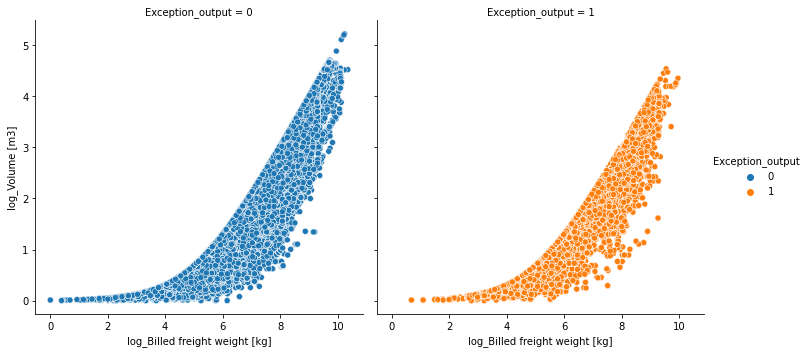

In [44]:
sns.relplot(x='log_Billed freight weight [kg]', y='log_Volume [m3]', hue='Exception_output', col='Exception_output', data=df2)

## Developing the model

### Algorithm for tranning the model

#### LinearSVC

In [45]:
x = df2[['log_Gross_weight [kg]', 'log_Volume [m3]', 'log_Billed freight weight [kg]', 'log_Loading_meter [ldm]']]
y = df2['Exception_output']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5 
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.05,
                                                   stratify = y)
print('Training elements %d e Testing elements %d' % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accurr = accuracy_score(test_y, pred) * 100
print('The accuracy is %.2f%%' % accurr)

Training elements 89737 e Testing elements 4723
The accuracy is 87.21%


C:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Checking the proportion 

In [47]:
train_y.value_counts()

0    78261
1    11476
Name: Exception_output, dtype: int64

In [48]:
test_y.value_counts()

0    4119
1     604
Name: Exception_output, dtype: int64

### Baseline algorithm for comparison of results

In [49]:
#Predictions for the baseline
pred_baseline = np.ones(4723)
accurr_baseline = accuracy_score(test_y, pred_baseline) * 100
print('The accuracy of the baseline is %.2f%%' %accurr_baseline)

The accuracy of the baseline is 12.79%


#### Checking the pattern of test data

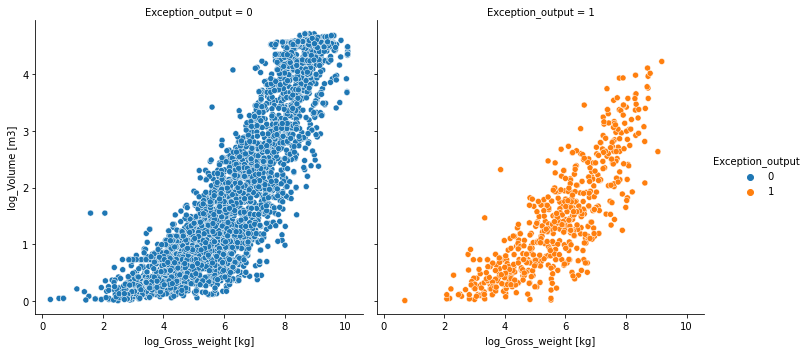

In [50]:
sns.relplot(x='log_Gross_weight [kg]', y='log_Volume [m3]', hue=test_y, col=test_y, data=test_x)

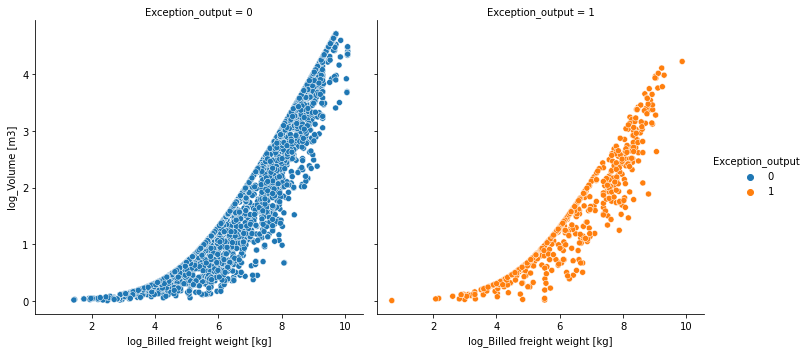

In [51]:
sns.relplot(x='log_Billed freight weight [kg]', y='log_Volume [m3]', hue=test_y, col=test_y, data=test_x)

### Baseline algorithm for comparison of results

In [52]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
accur = dummy_stratified.score(test_x, test_y) * 100

print('The accuracy of dummy is %.2f%%' % accur)

The accuracy of dummy is 87.21%


### Using another algorithm (SVM) 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5 
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.05,
                                                   stratify = y)
print('Training elements %d e Testing elements %d' % (len(train_x), len(test_x)))

model = SVC()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accurr = accuracy_score(test_y, pred) * 100
print('The accuracy is %.2f%%' % accurr)

Training elements 89737 e Testing elements 4723
The accuracy is 87.21%


### Rescaling variables

In [54]:
#standardizing on a range of specific ranges
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5 
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.05,
                                                   stratify = y)
print('Training elements %d e Testing elements %d' % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(test_x)

model = SVC()
model.fit(train_x, train_y)
pred = model.predict(test_x)

accurr = accuracy_score(test_y, pred) * 100
print('The accuracy is %.2f%%' % accurr)

Training elements 89737 e Testing elements 4723
The accuracy is 87.21%


### Aplication of the DecisionTree

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5 
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.05,
                                                   stratify = y)
print('Training elements %d e Testing elements %d' % (len(train_x), len(test_x)))


model = DecisionTreeClassifier(max_depth=5)
model.fit(raw_train_x, train_y)
pred = model.predict(raw_test_x)

accurr = accuracy_score(test_y, pred) * 100
print('The accuracy is %.2f%%' % accurr)

Training elements 89737 e Testing elements 4723
The accuracy is 87.30%


In [56]:
from sklearn import metrics
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4119
           1       0.83      0.01      0.02       604

    accuracy                           0.87      4723
   macro avg       0.85      0.50      0.47      4723
weighted avg       0.87      0.87      0.81      4723



### Printing the decision tree

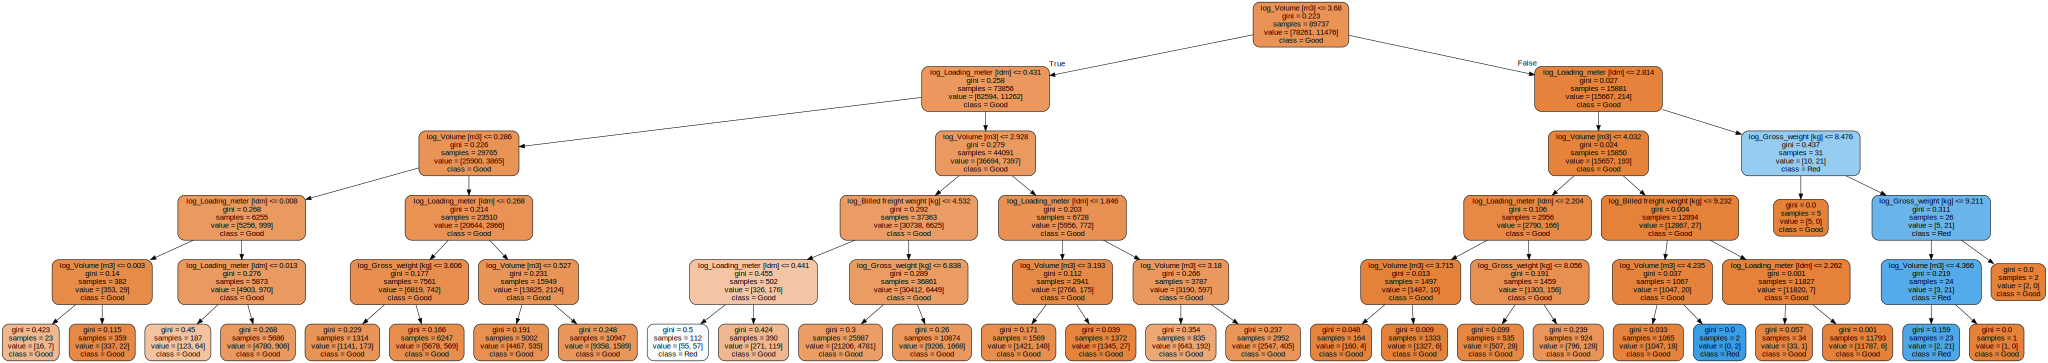

In [57]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ['Good', 'Red'])
graphic_tree = graphviz.Source(dot_data)
graphic_tree

### Cross validation (cv) with randomness

In [58]:
from sklearn.model_selection import cross_validate

SEED = 5 
np.random.seed(SEED)
model = DecisionTreeClassifier()
results = cross_validate(model, x, y, cv = 5, return_train_score=True)
results

{'fit_time': array([0.36573458, 0.35391712, 0.38036704, 0.46774387, 0.483464  ]),
 'score_time': array([0.        , 0.        , 0.01562428, 0.00897598, 0.        ]),
 'test_score': array([0.81113699, 0.80557908, 0.82182935, 0.81553038, 0.82526996]),
 'train_score': array([0.98463635, 0.9840938 , 0.98324688, 0.98410703, 0.98512598])}

In [59]:
results['test_score'].mean()

0.8158691509633709

In [60]:
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print('Accuracy with cross validation, 5 = [%.2f %.2f]' % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao)*100))

Accuracy with cross validation, 5 = [80.17 83.01]


#### Randomness in the cross validate (KFold)

In [61]:
def print_results(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print('Accuracy mean = [%.2f]' % (media * 100))
    print('Accuracy range with cross validation, 5 = [%.2f %.2f]' % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao)*100))

In [62]:
from sklearn.model_selection import KFold

SEED = 5 
np.random.seed(SEED)

cv = KFold(n_splits = 5)
model = DecisionTreeClassifier()
results = cross_validate(model, x, y, cv = cv, return_train_score=True)
print_results(results)

Accuracy mean = [81.76]
Accuracy range with cross validation, 5 = [73.98 89.55]


In [63]:
from sklearn.model_selection import KFold

SEED = 5 
np.random.seed(SEED)

cv = KFold(n_splits = 5, shuffle = True)
model = DecisionTreeClassifier()
results = cross_validate(model, x, y, cv = cv, return_train_score=True)
print_results(results)

Accuracy mean = [93.42]
Accuracy range with cross validation, 5 = [92.84 93.99]


In [64]:
print(metrics.classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      4119
           1       0.83      0.01      0.02       604

    accuracy                           0.87      4723
   macro avg       0.85      0.50      0.47      4723
weighted avg       0.87      0.87      0.81      4723

